In [112]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Wczytaj dane
data = pd.read_csv('platki_dane_zad4.csv', sep=';', header=0)

# Upewnij się, że dane są liczbowe
data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']] = \
    data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']].apply(pd.to_numeric, errors='coerce')

# Usuń brakujące dane
data = data.dropna()
print(data.info())
# Przygotuj dane wejściowe
X = data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas']]
y = data[['kalorie']]



<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 76
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nazwa         72 non-null     object 
 1   producent     72 non-null     object 
 2   kalorie       72 non-null     int64  
 3   cukry         72 non-null     int64  
 4   weglowodany   72 non-null     float64
 5   proteiny      72 non-null     int64  
 6   tluszcz       72 non-null     int64  
 7   sod           72 non-null     int64  
 8   blonnik       72 non-null     float64
 9   potas         72 non-null     int64  
 10  Liczba_polek  72 non-null     int64  
 11  srodk_polka   72 non-null     object 
 12  polka_1       72 non-null     int64  
 13  polka_2       72 non-null     int64  
 14  polka_3       72 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.0+ KB
None
cukry
count    72.000000
mean      6.888889
std       4.454956
min       0.000000
25%       3.000000
50

In [113]:
# podział danych na trzy zbiory UCZACY, WALIDACYJNY, TESTOWY

# Podział na zbiór treningowy i testowy
X_train, X_walidacyjne, y_train, y_walidacyjne = train_test_split(X, y, test_size=0.5, random_state=42)

column_names = X_train.columns  # This sets column_names to the actual feature names


X_walidacyjne, X_test, y_walidacyjne, y_test = train_test_split(X_walidacyjne, y_walidacyjne, test_size=0.5, random_state=42)



# PIERWSZY MODEL Z WSZYTSKIMI PARAMETRAMI LICZBOWYMI
# MODEL MA ZA ZADANIE PRZEWIDZIEĆ NA PODSTAWIE PARAMETRÓW KALOWYCZNOSC
# Dodaj stałą do modelu
X_train = sm.add_constant(X_train)
X_walidacyjne = sm.add_constant(X_walidacyjne)

# Dopasowanie modelu
wynik = sm.OLS(y_train, X_train).fit()
print(wynik.summary())

#korelacje paramrtow

print(data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'kalorie']].corr())



    cukry  weglowodany  proteiny  tluszcz  sod  blonnik  potas
69      3         21.0         2        1  200      0.0     35
3       0          8.0         4        0  140     14.0    330
18     13         12.0         1        1  180      0.0     65
40      3         21.0         2        1  260      0.0     40
9       5         13.0         3        0  210      5.0    190
62      3         22.0         2        0  290      0.0     35
7       8         18.0         3        2  210      2.0    100
38      6         17.0         2        1  170      1.0     60
71      3         16.0         3        1  200      3.0    110
56      6         14.0         4        1  135      2.0    110
75      3         17.0         3        1  200      3.0    110
16      2         21.0         2        0  290      1.0     35
28     12         14.0         3        0  240      5.0    190
43      3         16.0         4        1    0      0.0     95
27     10         12.0         3        2  160      5.0

In [114]:
# odrzucamy potas
# X=sm.add_constant(X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'sod', 'blonnik']])
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())
# odrzucamy sod 0.635
# X=sm.add_constant(X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']])
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())


# odrzucamy stałą
# X=X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'blonnik']]
# y=y_train['kalorie']
# wynik= sm.OLS(y, X).fit()
# print(wynik.summary())

# odrzucamy blonnik 0.151
# wynik= sm.OLS(y_train, X_train[['cukry', 'weglowodany', 'proteiny', 'tluszcz']]).fit()
# print(wynik.summary())

# korelacje modelu
print(data[['cukry', 'weglowodany', 'proteiny', 'tluszcz', 'kalorie']].corr())
#
# Zostawiamy Kalorie cykry i tłuszcz

wynik= sm.OLS(y_train, X_train[['cukry', 'tluszcz']]).fit()
print(wynik.summary())




                cukry  weglowodany  proteiny   tluszcz   kalorie
cukry        1.000000    -0.460999 -0.302288  0.289176  0.565274
weglowodany -0.460999     1.000000 -0.018152 -0.276522  0.271385
proteiny    -0.302288    -0.018152  1.000000  0.185327  0.025989
tluszcz      0.289176    -0.276522  0.185327  1.000000  0.509224
kalorie      0.565274     0.271385  0.025989  0.509224  1.000000
                                 OLS Regression Results                                
Dep. Variable:                kalorie   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              58.94
Date:                Sun, 22 Dec 2024   Prob (F-statistic):                    8.91e-12
Time:                        20:01:43   Log-Likelihood:                         -192.19
No. Observations:                  36   AIC:                                      

Rzeczywiste: 100
Predykcja: 65.6343786185221
--------------------------------
Rzeczywiste: 110
Predykcja: 29.134744901576198
--------------------------------
Rzeczywiste: 100
Predykcja: 46.211215350804636
--------------------------------
Rzeczywiste: 110
Predykcja: 119.21048278469644
--------------------------------
Rzeczywiste: 100
Predykcja: 67.98107143701114
--------------------------------
Rzeczywiste: 70
Predykcja: 75.34596025238083
--------------------------------
Rzeczywiste: 80
Predykcja: 0.0
--------------------------------
Rzeczywiste: 160
Predykcja: 160.4035021386204
--------------------------------
Rzeczywiste: 150
Predykcja: 158.05680932013138
--------------------------------
Rzeczywiste: 140
Predykcja: 102.13401233546801
--------------------------------
Rzeczywiste: 110
Predykcja: 106.82739797244606
--------------------------------
Rzeczywiste: 120
Predykcja: 90.07573788312024
--------------------------------
Rzeczywiste: 90
Predykcja: 75.34596025238083
------------------

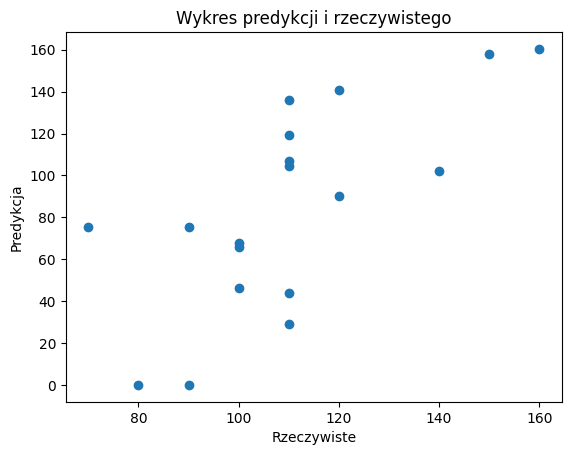

In [121]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


# Define the calculation functions
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def calculate_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)
def calculate_me(y_true, y_pred):
    return np.mean(y_true - y_pred)
def calculate_mpe(y_true, y_pred):
    return np.mean((y_true - y_pred) / y_true)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)
def calculate_u2(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
def calculate_um(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum(np.abs(y_true - np.mean(y_true)))
def calculate_ur(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) ** 2)
def calculate_ud(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2) / np.sum((np.abs(y_true) + np.abs(y_pred)) / 2)

y_walidacyjne_pred = wynik.predict(X_walidacyjne[['cukry', 'tluszcz']])

y_walidacyjne_1 = y_walidacyjne.squeeze()
y_walidacyjne_pred = y_walidacyjne_pred.squeeze()



for i in range(len(y_walidacyjne_pred)):
    # Safely fetch actual values
    rzeczywiste = y_walidacyjne.iloc[i, 0] if isinstance(y_walidacyjne, pd.DataFrame) else y_walidacyjne.iloc[i]
    print(f"Rzeczywiste: {rzeczywiste}")

    # Use .iloc for positional indexing on y_walidacyjne_pred
    predykcja = y_walidacyjne_pred.iloc[i]
    print(f"Predykcja: {predykcja}")
    print("--------------------------------")

# Predictions for validation data
# wypisac dane rzeczywiste i predykcyjne dla kazdego recordu


# Create a dictionary of metric functions
metrics = {
    "MAE": calculate_mae,
    "RMSE": calculate_rmse,
    "ME": calculate_me,
    "MPE": calculate_mpe,
    "MAPE": calculate_mape,
    "U2": calculate_u2,
    "UM": calculate_um,
    "UR": calculate_ur,
    "UD": calculate_ud
}

# Calculate each metric and store the result
results = {name: func(y_walidacyjne_1, y_walidacyjne_pred) for name, func in metrics.items()}

# Print the results
for name, value in results.items():
    print(f"{name}: {value}")


print(X_walidacyjne[['tluszcz', 'cukry']], y_walidacyjne_1 , y_walidacyjne_pred)

plt.scatter(y_walidacyjne_1, y_walidacyjne_pred)
plt.xlabel("Rzeczywiste")
plt.ylabel("Predykcja")
plt.title("Wykres predykcji i rzeczywistego")
plt.show()


In [ ]:
# dla testowych wypisz predykcje i wypisać ile